In [25]:
#exp2

In [24]:
import csv
with open(r"b.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)
    s = data[1][:-1]
    g = [['?' for i in range(len(s))] for j in range(len(s))]
    for i in data:
        if i[-1] == "Yes":
            for j in range(len(s)):
                if i[j] != s[j]:
                    s[j] = "?"
                    g[i][j] = "?"
        elif i[-1] == "No":
            for j in range(len(s)):
                if i[j] != s[j]:
                    g[j][j] = s[j]
                else:
                    g[j][j] = "?"
        print("\n Steps of candidate Elimination Algorithm",data.index(i)+1)
        print(s)
        print(g)
    gh = []
    for i in g:
        for j in i:
            if j!="?":
                gh.append(i)
                break
print("final specific hypothesis:\n",s)
print("\n Final general hypothesis:\n",gh)


 Steps of candidate Elimination Algorithm 1
['sunny', 'warm', 'high', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

 Steps of candidate Elimination Algorithm 2
['sunny', 'warm', 'high', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

 Steps of candidate Elimination Algorithm 3
['sunny', 'warm', 'high', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

 Steps of candidate Elimination Algorithm 4
['sunny', 'warm', 'high', 'strong', 'warm', 'same']
[['?', '?', '?', '?', '?', '?'], 

In [3]:
#exp3
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Predicted values:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Accuracy Score:
1.0


Matplotlib is building the font cache; this may take a moment.


|--- feature_2 <= -0.82
|   |--- class: 0
|--- feature_2 >  -0.82
|   |--- feature_3 <= 0.67
|   |   |--- feature_2 <= 0.64
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.64
|   |   |   |--- class: 2
|   |--- feature_3 >  0.67
|   |   |--- feature_0 <= 0.08
|   |   |   |--- class: 2
|   |   |--- feature_0 >  0.08
|   |   |   |--- class: 2



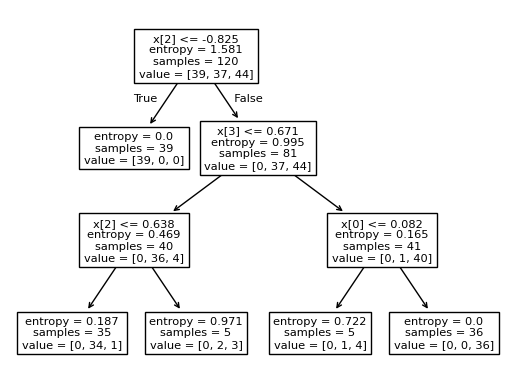

In [4]:
iris = datasets.load_iris()
x = iris.data
y = iris.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)
clf_entropy = DecisionTreeClassifier(criterion = "entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(x_train,y_train)
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(x_train,y_train)
y_pred = clf_entropy.predict(x_test)
print("Predicted values:")
print(y_pred)
print("Accuracy Score:")
print(accuracy_score(y_test,y_pred))
cm = np.array(confusion_matrix(y_test,y_pred))
tree.plot_tree(clf_entropy)
text_rep = tree.export_text(clf_entropy)
print(text_rep)